In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import pickle
import scipy.stats as st
import itertools
import seaborn as sns

# Filters dataframe based on neuron type. 
# Establishes a synapse threshold of greater than 1
# data - the dataframe
# col_substr - regex to select for substrings that represent neuron type in columns
# row_substr - regex to select for substrings that represent neuron type in rows
# row_header - header for indices
def filter_neuron_types(data, col_substr, row_substr, idx_header):
    first_column = df.iloc[:, 0] # gets first column to use as row indices
    # columns
    new_df = data.filter(regex=col_substr, axis='columns') 
    
    # rows
    new_df.insert(0, idx_header, first_column, True) # inserts column with row labels into the new dataframe
    new_df.set_index(idx_header, inplace=True) # sets inserted column as dataframe indicies
    new_df = new_df.filter(regex=row_substr, axis='index')
    
    # establishing a threshold of num synapses > 1 to count as a connection
    num_rows = len(new_df)
    # loops thru rows of new_df
    for i in range(num_rows):
        row = new_df.iloc[i] # gets row
        new_row = np.where(row == 1, 0, row) # if synaspse num = 1, change to 0
        new_df.iloc[i] = new_row
    
    return new_df

# Normalizes weights by column's sum in a pandas df
# df - dataframe
# sum_of_w - the sum of the weights
def normalize_weights_df(df, sum_of_w):
    col = len(df.columns)
    #df.iloc[:,0:col] = df.iloc[:,0:col].apply(lambda x: x / np.linalg.norm(x), axis=0)
    #df = normalize(df, axis=0, norm='l1') # normalize by column to sum of 1
    for c in range(col):
        w = df.iloc[:,c]
        s = sum(abs(w)) # sum of column
        if (s != 0):
            df.iloc[:,c] = [i/s for i in w]
    return sum_of_w * df

# Normalizes weights by column's sum in a numpy array
# arr - numpy array
# sum_of_w - the sum of the weights
def normalize_weights_np(arr, sum_of_w):
    col = len(arr[0])
    #df.iloc[:,0:col] = df.iloc[:,0:col].apply(lambda x: x / np.linalg.norm(x), axis=0)
    #df = normalize(df, axis=0, norm='l1') # normalize by column to sum of 1
    for c in range(col):
        w = arr[:,c]
        s = sum(abs(w)) # sum of column
        if (s != 0):
            arr[:,c] = [i/s for i in w]
    return sum_of_w * arr


df = pd.read_csv('connectivity matrix table 1.csv') # matrix of connections between neurons

# FILTER DATA FOR PNs (rows) to KCs (columns) CONNECTIONS -> pn_kc
pn_kc = filter_neuron_types(df, "(?=.*KC)(?=.*left)", "(?=.*PN)(?=.*left)", "Presynaptic PNs") # filter w/ regex PNs and KCs

# normalize weights
pn_kc = normalize_weights_df(pn_kc, 1)
#pn_kc = pn_kc.fillna(0)

# FILTER DATA FOR KCs TO MBONs CONNECTIONS -> kc_to_mbon
kc_mbon = filter_neuron_types(df, "(?=.*MBON)(?=.*left)", "(?=.*KC)(?=.*left)", "Presynaptic KCs") # filter w/ regex for KCs and MBON lefts

# take out MBONs with no KC connections
kc_mbon = kc_mbon.drop(kc_mbon.loc[:, (kc_mbon.sum(axis=0) == 0)], axis=1)

# adding a fictional MBON
fict_weights = np.full(len(kc_mbon), 0.1) # initializing all weights at 0.1
kc_mbon['MBON-fict'] = fict_weights

# normalizing weights
kc_mbon = normalize_weights_df(kc_mbon, 1)
kc_mbon = kc_mbon.fillna(0)

# Set numbers
num_kcs = len(pn_kc.columns)
num_pns = len(pn_kc) # number of PNs (40), also = number of dimensions of the odor
num_mbons = len(kc_mbon.columns)
R = 10 # number of realizations of training

kc_mbon

,MBON-a1 left,MBON-a2 left,MBON-b1 left,MBON-b2 left,MBON-c1 left,MBON-d1 left,MBON-e1 left,MBON-e2 left,MBON-g1 left,MBON-g2 left,MBON-h1 left,MBON-h2 left,MBON-i1 left,MBON-k1 left,MBON-m1 left,MBON-n1 left,MBON-o1 left,MBON-q1 left,MBON-fict
Presynaptic KCs,,,,,,,,,,,,,,,,,,,
1 claw KC left,0.014286,0.011416,0.036723,0.019663,0.034662,0.024450,0.033386,0.052632,0.015595,0.014894,0.020761,0.025974,0.048128,0.000000,0.028249,0.0,0.031746,0.034965,0.009091
1 claw KC left,0.028571,0.009132,0.042373,0.042135,0.023397,0.031785,0.027027,0.022556,0.031189,0.023404,0.006920,0.018182,0.026738,0.000000,0.000000,0.0,0.031746,0.000000,0.009091
1 claw KC left,0.035714,0.009132,0.028249,0.039326,0.019064,0.022005,0.019078,0.030075,0.021442,0.019149,0.020761,0.023377,0.053476,0.034483,0.011299,0.0,0.031746,0.062937,0.009091
1 claw KC left,0.039286,0.011416,0.067797,0.056180,0.033795,0.022005,0.030207,0.045113,0.025341,0.008511,0.024221,0.036364,0.026738,0.000000,0.016949,0.0,0.000000,0.013986,0.009091
1 claw KC left,0.010714,0.006849,0.033898,0.022472,0.054593,0.034230,0.012719,0.000000,0.007797,0.023404,0.031142,0.018182,0.026738,0.022989,0.028249,0.0,0.000000,0.076923,0.009091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
young KC left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.009091
young KC left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.009091
young KC left,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.009091


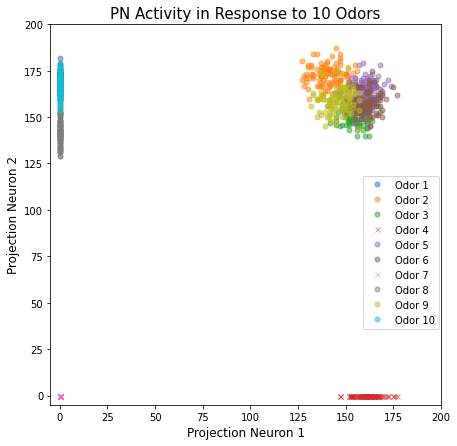

In [2]:
N = 10
num_pns = 40
num_inputs = 50000
spikes = 200
num_mbons = 19
K = 23
T = 5000

with open('C:/Katherine/Research/experiment-data-v3/10-odors/control2/input-means7.pkl', 'rb') as f:
    input_means = pickle.load(f)
    
response = input_means
# print(response)

bool_response = np.where(input_means > 0, 1, 0)
# print(bool_response)

all_inputs = np.zeros((num_inputs, num_pns))
odor_idx = num_inputs//N
pn_inputs = np.zeros((N, num_inputs//N, num_pns))
for n in range(N):
    inputs = np.random.binomial(spikes, response[n], size=(num_inputs//N, num_pns))
    all_inputs[n*odor_idx:odor_idx*(n + 1)] = inputs
    pn_inputs[n] = inputs
    
# print("pn_inputs shape: {}".format(pn_inputs.shape))

# fire = np.ones((N, num_inputs//N))
# fire[2] = 0
# fire = fire.astype(int)
# print(fire)

# categories = ['x', 'o', 'o']
categories = ['o', 'o', 'o', 'x', 'o', 'o', 'x', 'o', 'o', 'o']
labels = []
for i in range(N):
    labels.append("Odor {}".format(i+1))

# plotting
plt.figure(figsize=(7,7))
for i in range(N):
    # 22, 23 - 10 odors
    # 9, 10 - 3 odors
    plt.plot(pn_inputs[i, 0:100, 22], pn_inputs[i, 0:100, 23], marker = categories[i], markersize=5, alpha = 0.5,
             label = labels[i], linestyle = '')
#     sns.scatterplot(x = pn_inputs[i, :, 9], y = pn_inputs[i, :, 10], s = 100, palette = 'Accent', style = categories[i])
plt.xlim(-5, 200)
plt.ylim(-5, 200)
plt.legend(loc=(0.8,0.2))
plt.title('PN Activity in Response to {} Odors'.format(N), fontsize=15)
plt.xlabel('Projection Neuron 1', fontsize=12)
plt.ylabel('Projection Neuron 2', fontsize=12)
plt.show()

In [35]:
with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-ablation/all-error-rates14.pkl', 'rb') as f:
    error_over_time_a = pickle.load(f) # dimensions: K, R, T, num_mbons
    
print(len(error_over_time_a))
print(len(error_over_time_a[0]))
print(len(error_over_time_a[0][0]))
print(len(error_over_time_a[0][0][0]))

23
10
5000
19


In [41]:
with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-ablation/kcs-removed14.pkl', 'rb') as f:
    kcs_removed = pickle.load(f)

print(len(kcs_removed))
print(len(kcs_removed[0]))
print(len(kcs_removed[0][0]))

23
10
1


### Number KC Removed in Pruning vs. Ablation (> 0.45 ER Difference)

In [54]:
num_mbons = 18
K = 23
T = 5000

# get the number kc from string arr
# a - num kcs removed
def get_num_kc(str, a):
    nums = np.zeros(a)
    for i in range(a):
        end = False
        s = str[i]
        j = 1
        num_str = ""
        while end == False:
            # end loop if space is reached
            if s[-j] == " ": 
                end = True
            else:
                num_str = s[-j] + num_str
            j += 1
        nums[i] = int(num_str)
    return nums

# returns the number removed from mbon
# mbon - index of mbon
def count_num_removed(kc_mbon, nums, mbon):
    count = 0
    nums = nums.astype(int)
    for i in range(len(nums)):
        if kc_mbon.iloc[nums[i], mbon] != 0:
            count += 1
    return count

# import data for pruning
# with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-pruning2/all-error-rates12.pkl', 'rb') as f:
#     error_over_time_p = pickle.load(f) # dimensions: K, R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/control2/all-error-rates7.pkl', 'rb') as f:
    error_control_p = pickle.load(f) # dimensions: R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-pruning/all-error-rates12.pkl', 'rb') as f:
    error_over_time_p = pickle.load(f) # dimensions: K, R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/control2/all-error-rates7.pkl', 'rb') as f:
    error_control_a = pickle.load(f) # dimensions: R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-ablation/all-error-rates14.pkl', 'rb') as f:
    error_over_time_a = pickle.load(f) # dimensions: K, R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-ablation/kcs-removed14.pkl', 'rb') as f:
    kcs_removed = pickle.load(f)

# record x and y coordinates from every realization
x_total = np.zeros((R, num_mbons))
y_total = np.zeros((R, num_mbons))

# number of KCs supposedly to be removed
numbers = np.ones(23)
numbers[1:] = np.linspace(5, 110, 22)
numbers = numbers.astype(int).tolist()

for r in range(R):

    # PRUNING
    # x-axis -> number of KCs removed 
    x_p = []

    for i in range(num_mbons):
        for j in range(K):
            x_p.append(numbers[j])
    # print(x_a)

    # y-axis - final error rate for realization r
    y_p = []
    for k in range(num_mbons):
        for i in range(K):
            y_p.append(error_over_time_p[i,r,-1,k] - error_control_p[r,-1,k]) # exclude fictional MBON (will skew results)


    # ABLATION
    # gets number of presynaptic KCs for each MBON
    bool_synapses = np.where(kc_mbon > 0, 1, 0)
    conn = np.zeros(num_mbons)
    for j in range(num_mbons):
        conn[j] = bool_synapses[:,j].sum()
    conn = conn.astype(int) # number of connections to KCs for each MBON

    # x-axis -> number of KCs removed
    x_a = []

    # x-axis calculations - calculates the actual number of synapses removed
    for i in range(num_mbons):
        for j in range(K):
            n = numbers[j] # num kcs ablated
            l = kcs_removed[j][r] # list of kcs removed for realization r
            l_num = get_num_kc(l, n) # converts list of names to numbers

            num_removed = count_num_removed(kc_mbon, l_num, i) # number of kc connections removed from this MBON
            x_a.append(num_removed)    
    # print(x_p)

    # y-axis - final error rate for realization r
    y_a = []
    for m in range(num_mbons):
        for k in range(K):
            y_a.append(error_over_time_a[k, r, -1, m] - error_control_a[r, -1, m]) # excludes fict. MBON (skews results)
    # print(y_p)

    # SUMMARY
    # Get the x and y coordinates for summary plot
    x_p = np.asarray(x_p).reshape(num_mbons, K)
    y_p = np.asarray(y_p).reshape(num_mbons, K)

    x_a = np.asarray(x_a).reshape(num_mbons, K)
    y_a = np.asarray(y_a).reshape(num_mbons, K)

    x = np.zeros(num_mbons) # ablation
    y = np.zeros(num_mbons) # pruning

    for m in range(num_mbons):
        num_removed_x = 0
        # ablation
        found_a = False
        k_a = 0 # move through the columns
        while (not found_a) and (k_a < K):
            if y_a[m, k_a] > 0.45:
                x[m] = x_a[m, k_a]
                found_a = True
            k_a += 1

        # pruning
        found_p = False
        k_p = 0 # move through the columns
        while (not found_p) and (k_p < K):
            # ablation
            if y_p[m, k_p] > 0.45:
                y[m] = x_p[m, k_p]
                found_p = True
            k_p += 1 

    print("Realization {}".format(r+1))
    print("Ablation:", x)
    print("Pruning:", y)
    print()

    x_total[r] = x
    y_total[r] = y

Realization 1
Ablation: [53. 63. 45. 36. 44. 53. 59. 36. 59. 61. 49. 47. 33. 22. 48.  0. 12. 35.]
Pruning: [50. 65. 45. 45. 55. 50. 60. 40. 60. 60. 45. 50. 40. 30. 50.  0. 20. 35.]

Realization 2
Ablation: [53. 61. 45. 43. 50. 49. 55. 38. 57. 58. 52. 51. 38. 30. 49.  0. 15. 34.]
Pruning: [55. 65. 40. 45. 50. 50. 55. 35. 60. 60. 45. 55. 40. 30. 45.  0. 15. 35.]

Realization 3
Ablation: [48. 59. 45. 45. 51. 53. 55. 38. 57. 57. 50. 50. 35. 29. 42.  0.  9. 36.]
Pruning: [55. 65. 40. 45. 55. 50. 60. 40. 55. 60. 50. 55. 45. 25. 45.  0. 15. 35.]

Realization 4
Ablation: [49. 59. 46. 44. 54. 53. 55. 34. 55. 61. 54. 49. 39. 29. 48.  0. 11. 36.]
Pruning: [50. 60. 45. 45. 55. 55. 55. 35. 60. 60. 50. 55. 40. 30. 50.  0. 15. 35.]

Realization 5
Ablation: [55. 63. 45. 46. 52. 49. 57. 33. 56. 56. 52. 48. 39. 27. 47.  0. 13. 34.]
Pruning: [55. 55. 45. 45. 55. 55. 50. 35. 60. 60. 50. 55. 40. 30. 50.  0. 20. 35.]

Realization 6
Ablation: [37. 61. 45. 45. 53. 52. 57. 28. 61. 59. 53. 51. 41. 27. 51.  0. 1

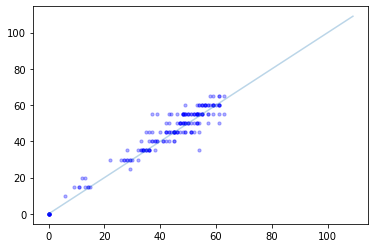

In [55]:
plt.figure()
for r in range(10):
    for m in range(num_mbons):
        plt.scatter(x_total[r, m], y_total[r, m], alpha=0.3, label=names[m], color='blue', s=10)
plt.plot(np.arange(110), np.arange(110), alpha=0.3, label="y = x")

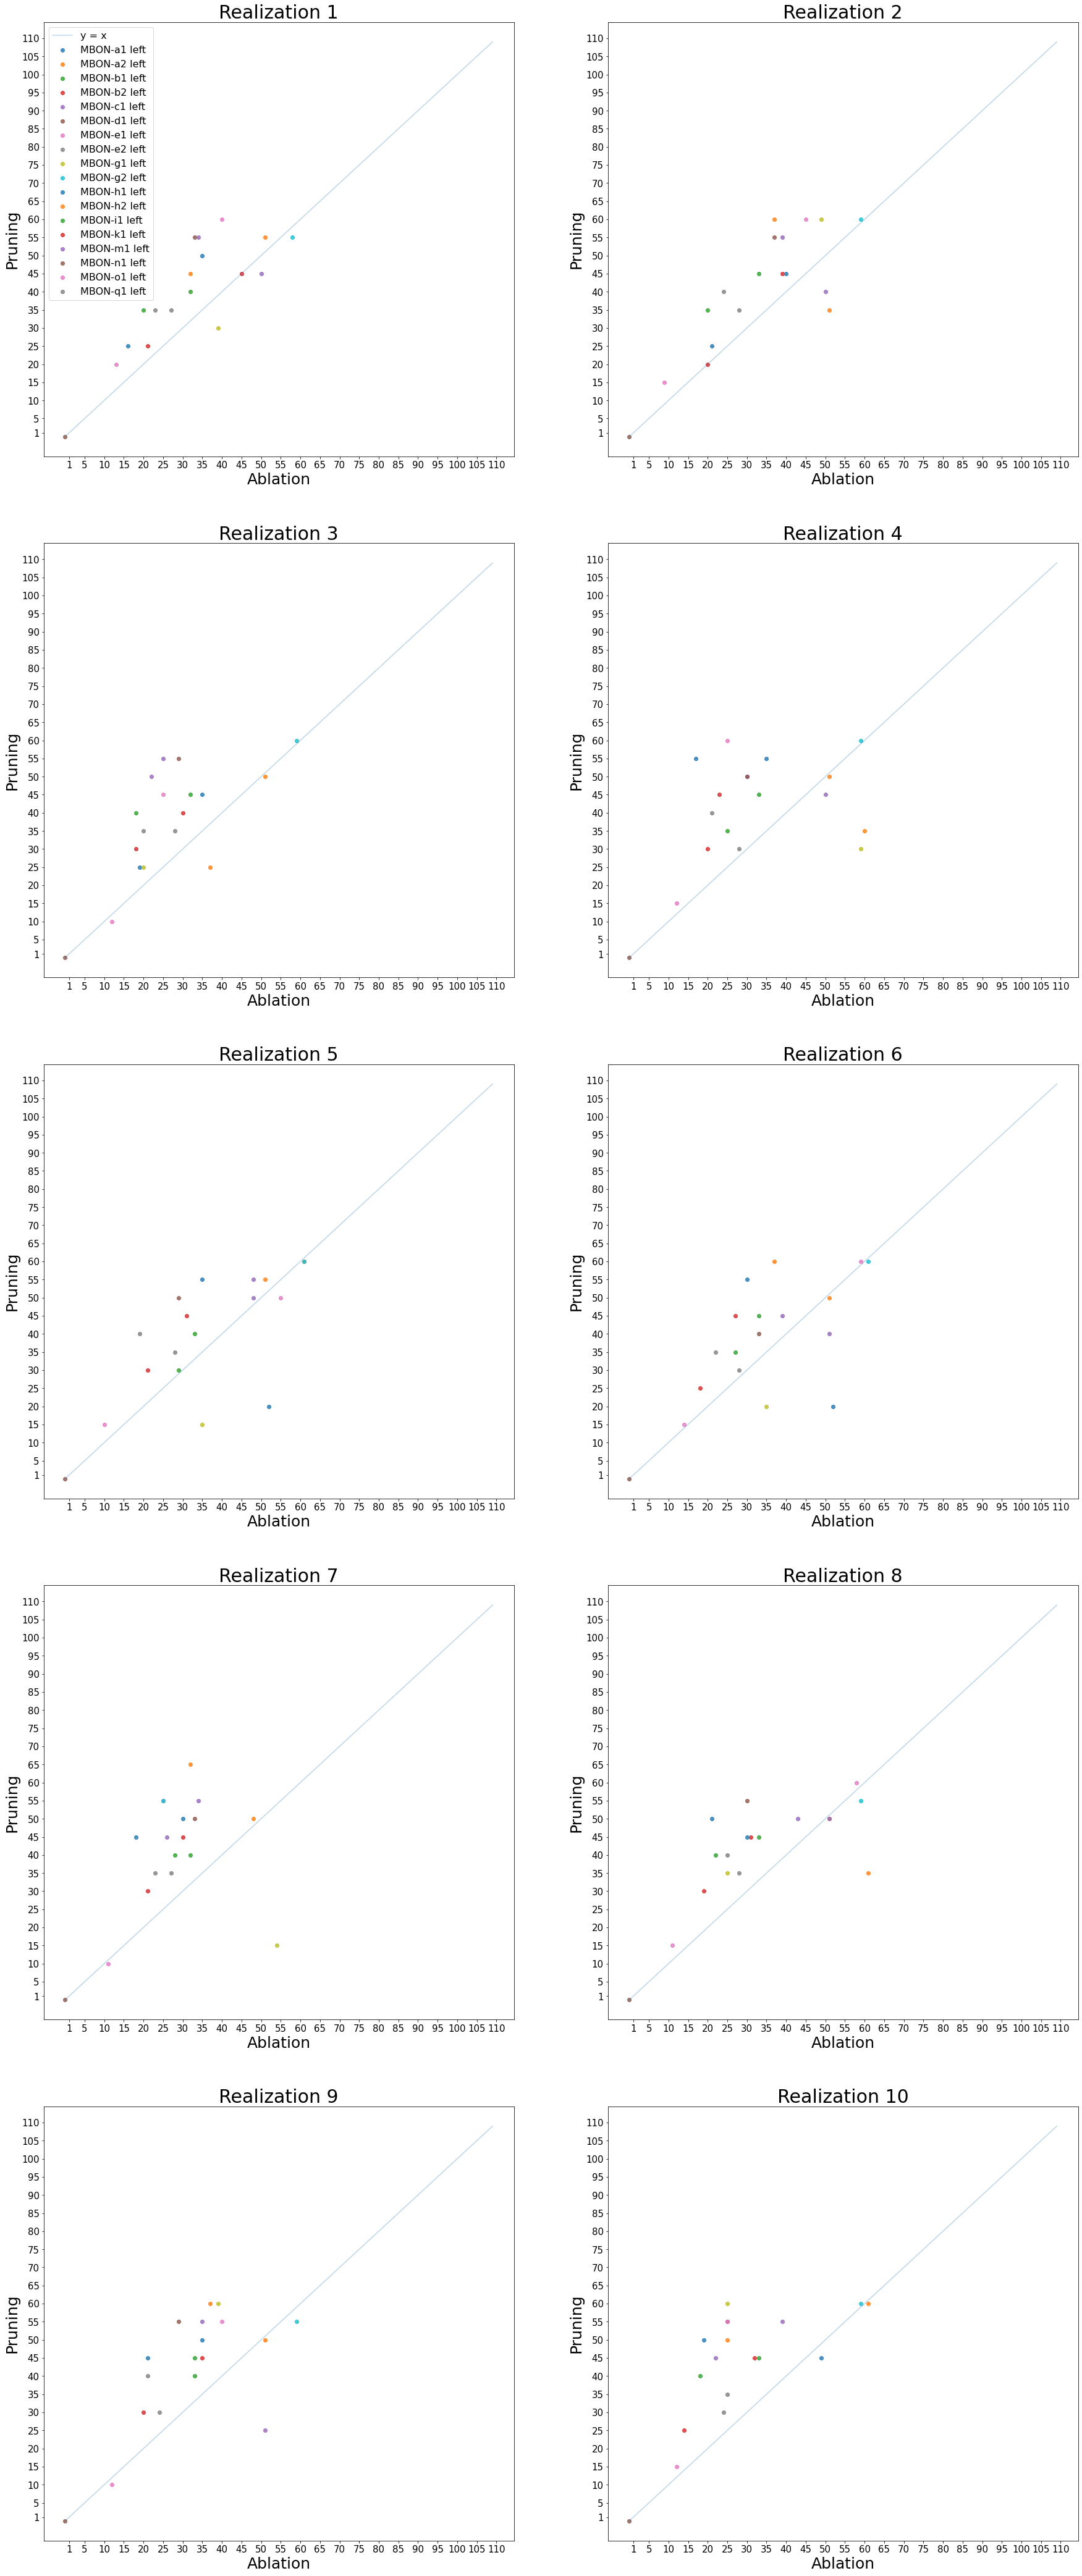

In [45]:
fig, ax = plt.subplots(5, 2, figsize=(30, 75))

names = kc_mbon.columns[0:-1]

r = 0
for i in range(5):
    for j in range(2):
        for m in range(num_mbons):
            ax[i, j].scatter(x_total[r, m], y_total[r, m], alpha=0.8, label=names[m])
        ax[i, j].plot(np.arange(110), np.arange(110), alpha=0.3, label="y = x")
        ax[i, j].set_xlabel("Ablation", fontsize=25)
        ax[i, j].set_ylabel("Pruning", fontsize=25)
        ax[i, j].set_xticks(numbers)
        ax[i, j].set_yticks(numbers)
        ax[i, j].tick_params(axis='both', which='major', labelsize=15)
        ax[i, j].set_title(f"Realization {r+1}", fontsize=30)
        if r == 0:
            ax[i, j].legend(fontsize=16)

        r += 1
    
# plt.title("Random - # of KCs Removed in Pruning vs. Ablation (Threshold: > 0.45)", fontsize=20)
plt.show()

In [28]:
# TARGETED PRUNING AND ABLATION
sum_slope = 0

for r in range(R):
    res = st.linregress(x_total[r], y_total[r])
    sum_slope += res.slope
    print(f"Realization {r+1}")
    print(res)
    print(f"R-squared: {res.rvalue**2}\n")
    
print(f"Average slope: {sum_slope / R}") 

Realization 1
LinregressResult(slope=0.5295454545454547, intercept=9.011363636363633, rvalue=0.5849219298184208, pvalue=0.01077944395442813, stderr=0.18357527217107958, intercept_stderr=7.349382264082507)
R-squared: 0.3421336639825056

Realization 2
LinregressResult(slope=0.7317767653758543, intercept=4.693621867881543, rvalue=0.7405327419489094, pvalue=0.00044005790889660955, stderr=0.16601859703639069, intercept_stderr=7.352039633991906)
R-squared: 0.5483887418983701

Realization 3
LinregressResult(slope=0.5505022831050228, intercept=6.8831050228310495, rvalue=0.6466658819463732, pvalue=0.0037293153618954272, stderr=0.1623359534466947, intercept_stderr=6.86337520352321)
R-squared: 0.41817676287348066

Realization 4
LinregressResult(slope=0.3854113655640373, intercept=16.79361040429743, rvalue=0.3793860322795306, pvalue=0.12047993539194404, stderr=0.234983232369964, intercept_stderr=9.988706988884058)
R-squared: 0.14393376148880505

Realization 5
LinregressResult(slope=0.6606261135148

In [13]:
# RANDOM PRUNING AND ABLATION
sum_slope = 0
# slopes = np.zeros(R)

for r in range(R):
    res = st.linregress(x_total[r], y_total[r])
    sum_slope += res.slope
#     slopes[r] = res.slope
    print(f"Realization {r+1}")
    print(res)
    print(f"R-squared: {res.rvalue**2}\n")

# print(slopes)
print(f"Average slope: {sum_slope / R}") 

Realization 1
LinregressResult(slope=1.009009009009009, intercept=-3.564564564564556, rvalue=0.9489562832869861, pvalue=1.973227890683747e-09, stderr=0.08384188627605398, intercept_stderr=3.916362512301461)
R-squared: 0.9005180275898507

Realization 2
LinregressResult(slope=0.9211825662907651, intercept=0.5601950624809433, rvalue=0.9726897847836112, pvalue=1.4283386144027943e-11, stderr=0.054954507876023115, intercept_stderr=2.5224923931043928)
R-squared: 0.946125417422388

Realization 3
LinregressResult(slope=1.028420744213302, intercept=-2.8505713448578973, rvalue=0.9828540807927654, pvalue=3.5593957003623076e-13, stderr=0.04823336437236852, intercept_stderr=2.2444212155730847)
R-squared: 0.9660021441309917

Realization 4
LinregressResult(slope=0.9867930115487119, intercept=0.29819366301450856, rvalue=0.9904187680004753, pvalue=3.465279800857031e-15, stderr=0.03439775663817065, intercept_stderr=1.5995881480900587)
R-squared: 0.9809293360075794

Realization 5
LinregressResult(slope=1.

## Percentage of type out of total number ablated vs number of kcs ablated

In [9]:
# percentage of type out of total number ablated vs number of kcs ablated
with open('C:/Katherine/Research/experiment-data-v3/10-odors/targeted-pruning/kcs-removed10.pkl', 'rb') as f:
    kc_names = pickle.load(f)
print(len(kc_names))
print(len(kc_names[0]))
print(len(kc_names[0][0]))
# print(kc_names)
kc_types = ['1 claw KC left', '2 claw KC left', '3 claw KC left', '4 claw KC left', '5 claw KC left', 
         '6 claw KC left', 'young KC left']

# x-axis -> number of KCs removed
x = np.ones(23)
x[1:] = np.linspace(5, 110, 22)
x = x.astype(int)
# print(x)

# format names
for r in range(R):
    for a in range(len(kc_names)):
        sub_list = kc_names[a][r] # r = realization
        for b in range(len(sub_list)):
            s = sub_list[b]
            idx = s.index('t') + 1 # index after t in "left"
            kc_names[a][r][b] = s[0:idx]
print(kc_names[1][0])
print(kc_names[1][1])
# print(kc_names)

# y-axis -> percentage of each type out of the total number of kcs ablated
y = np.zeros((R, 7, K)) # 7 = number of KC types
for r in range(R):
    for k in range(K):
        names = kc_names[k][r] # the k removed KCs, for realization r
        for t in range(7):
            y[r, t, k] = names.count(kc_types[t]) / float(x[k])
print(len(y))
print(len(y[0]))
print(len(y[0][0]))
print(y)

23
10
1
['1 claw KC left', '2 claw KC left', '1 claw KC left', '3 claw KC left', '1 claw KC left']
['1 claw KC left', '2 claw KC left', '1 claw KC left', '2 claw KC left', '1 claw KC left']
10
7
23
[[[1.         0.6        0.7        ... 0.14       0.13333333 0.15454545]
  [0.         0.2        0.1        ... 0.1        0.0952381  0.1       ]
  [0.         0.2        0.1        ... 0.09       0.13333333 0.12727273]
  ...
  [0.         0.         0.         ... 0.08       0.07619048 0.07272727]
  [0.         0.         0.         ... 0.04       0.03809524 0.04545455]
  [0.         0.         0.1        ... 0.37       0.35238095 0.33636364]]

 [[1.         0.6        0.6        ... 0.14       0.15238095 0.15454545]
  [0.         0.4        0.2        ... 0.08       0.08571429 0.1       ]
  [0.         0.         0.         ... 0.13       0.13333333 0.12727273]
  ...
  [0.         0.         0.1        ... 0.08       0.07619048 0.07272727]
  [0.         0.         0.         ... 0.05    

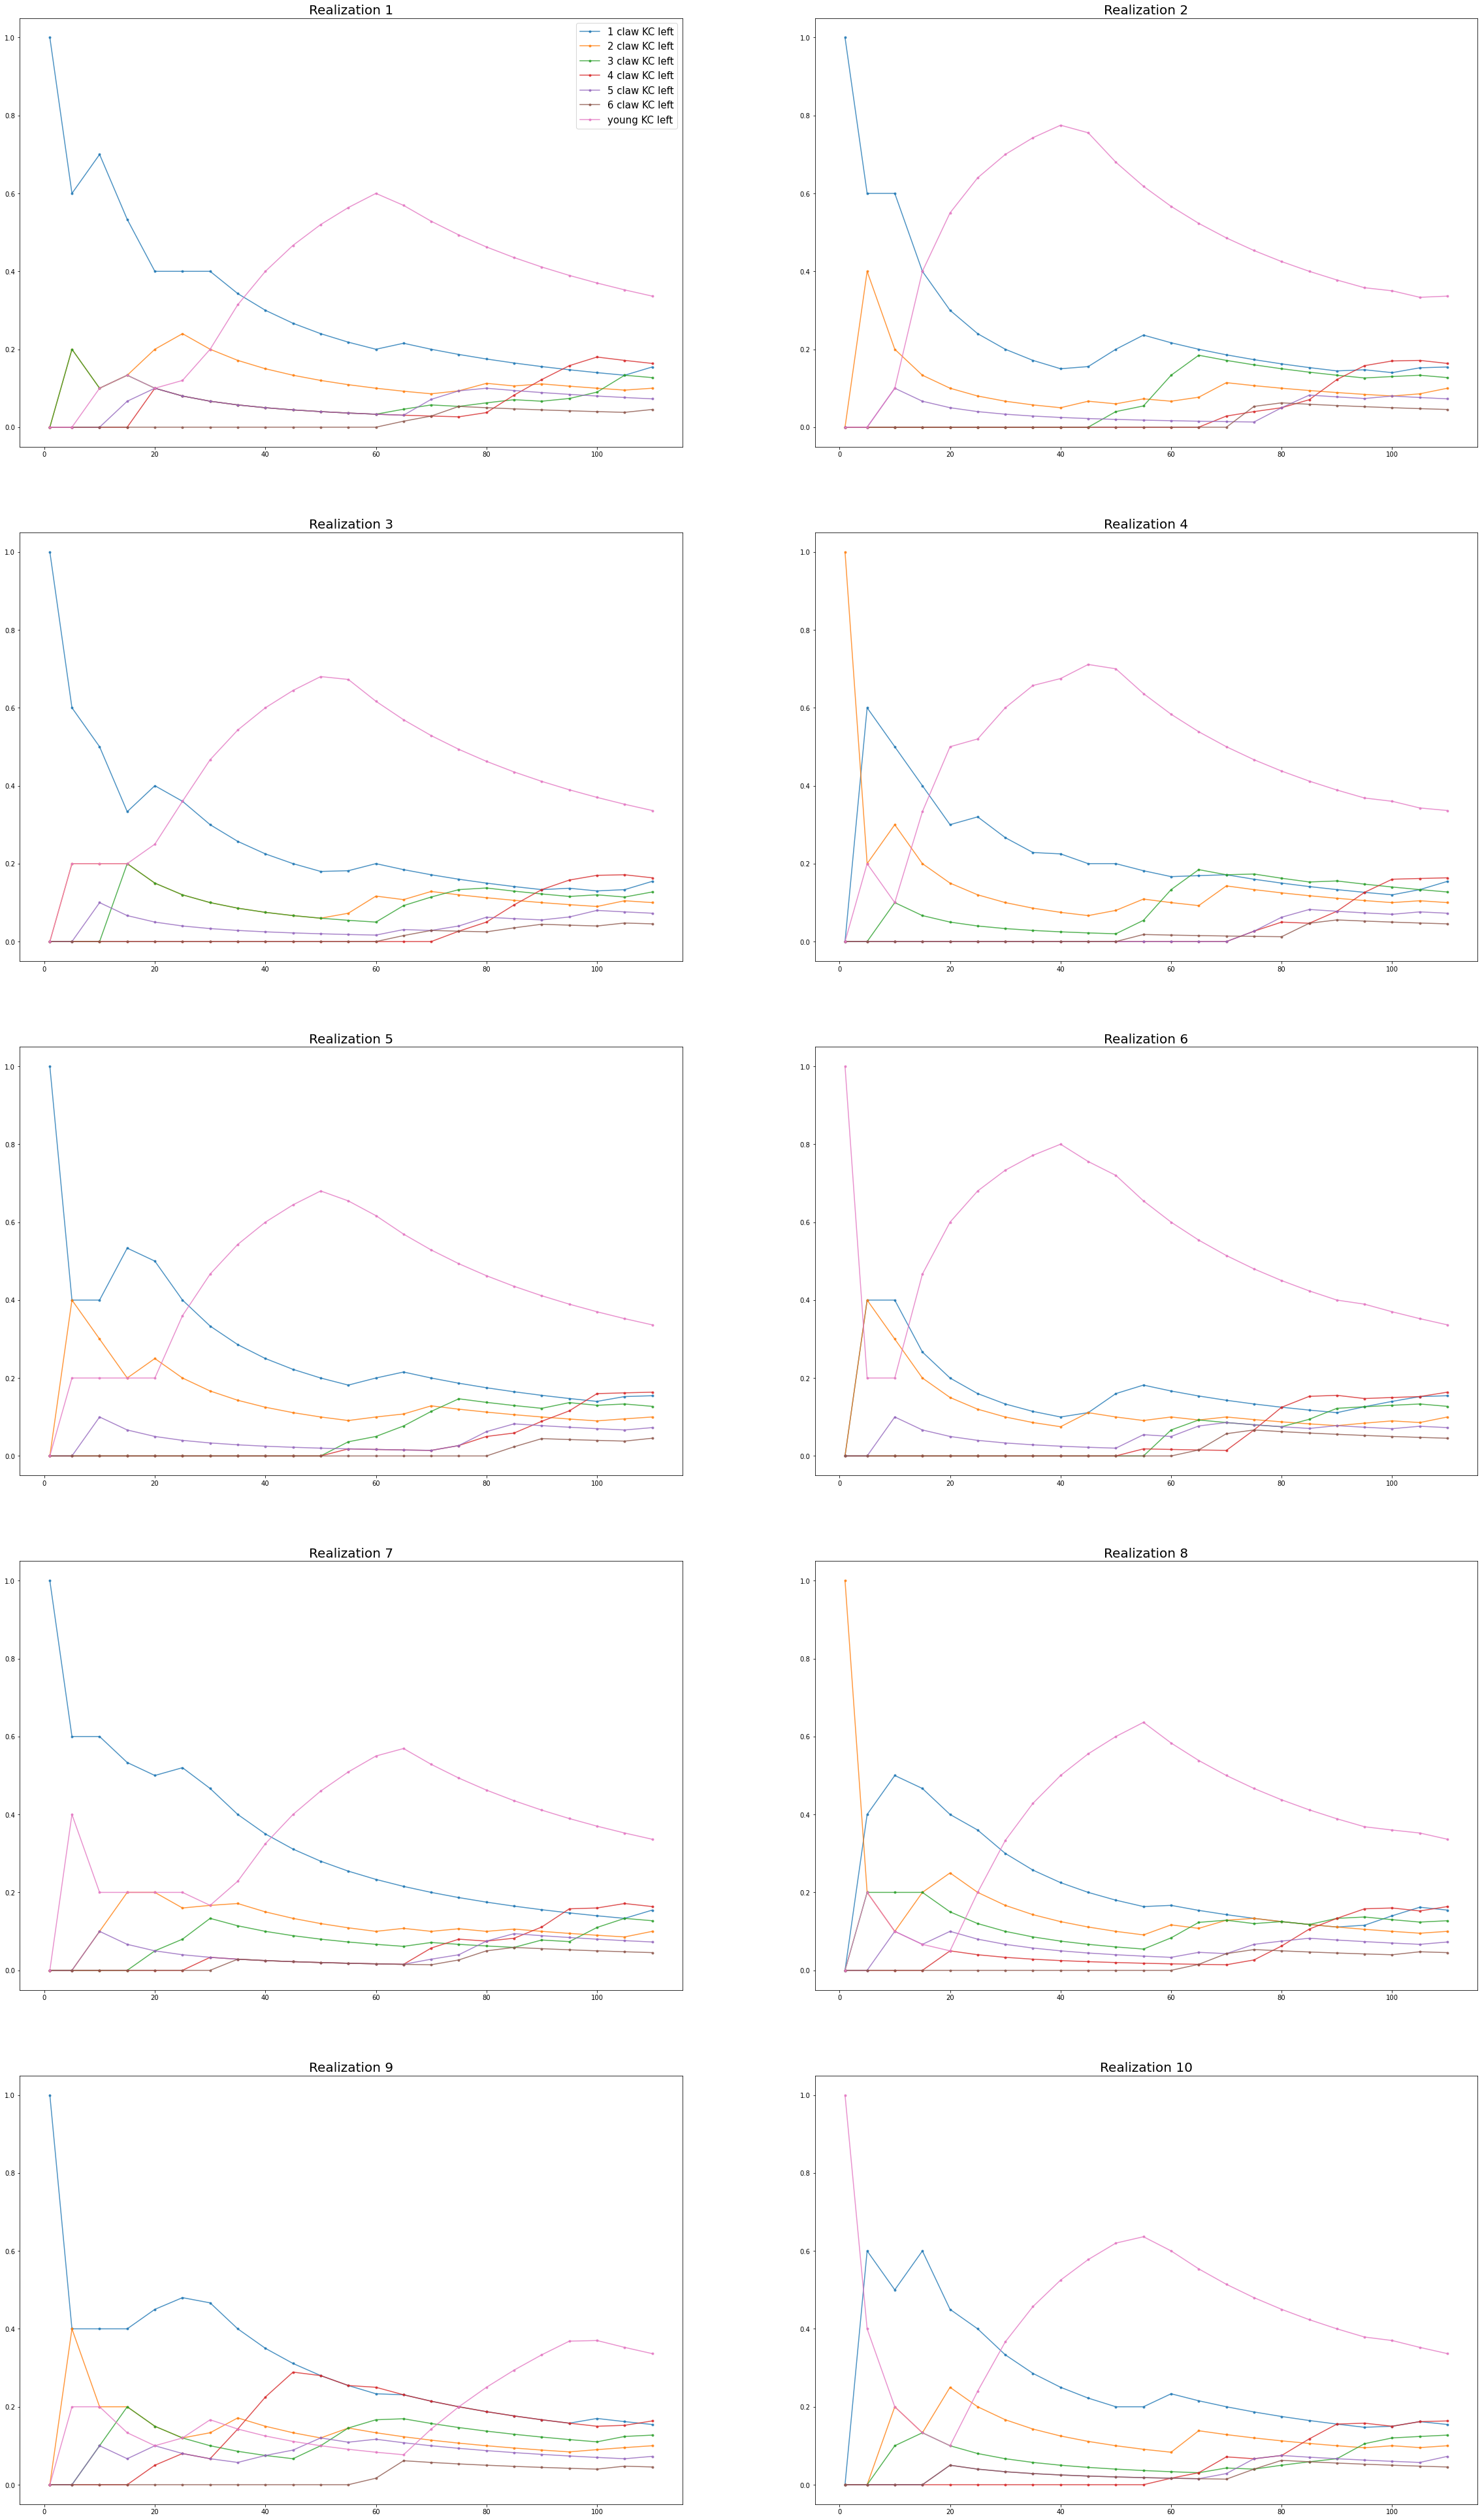

In [10]:
# plot graph
fig, ax = plt.subplots(5, 2, figsize=(40, 70))

a = 0 # number realizations
for row in range(5):
    for col in range(2):
        for t in range(7):
            ax[row, col].plot(x, y[a,t], alpha=0.8, marker='.', label=kc_types[t])
        #     plt.scatter(x, y[0,t], alpha=0.8, s=5)
        ax[row, col].set_title(f"Realization {a+1}", fontsize=20)
        if a == 0:
            ax[row, col].legend(fontsize=15)
        a += 1
plt.show()

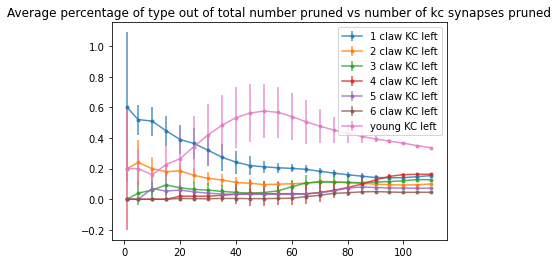

In [12]:
# averaged plot

# calculate average percentages across realizations
y_avg = np.mean(y, axis=0)
# print(len(y_avg))
# print(y_avg)

# calculate std of percentages across realizations
y_std = np.std(y, axis=0)
# print(len(y_std))

# plot
plt.figure()
for t in range(7):
    plt.errorbar(x, y_avg[t], yerr=y_std[t], alpha=0.8, marker='.', label=kc_types[t])
plt.title("Average percentage of type out of total number pruned vs number of kc synapses pruned")    
plt.legend()

## Percentage ablated of each type vs number of kcs ablated

In [15]:
# percentage of type out of total number ablated vs number of kcs ablated
with open('C:/Katherine/Research/experiment-data-v3/10-odors/targeted-pruning/kcs-removed13.pkl', 'rb') as f:
    kc_names = pickle.load(f)

kc_types = ['1 claw KC left', '2 claw KC left', '3 claw KC left', '4 claw KC left', '5 claw KC left', 
         '6 claw KC left', 'young KC left']

# find number of each type of KC in the network
list_names = list(kc_mbon.index)
type_counts = np.zeros(7)
for t in range(7):
    type_counts[t] = list_names.count(kc_types[t])
print(type_counts)
        
# x-axis -> number of KCs removed
x = np.ones(23)
x[1:] = np.linspace(5, 110, 22)
x = x.astype(int)
# print(x)

# format names
for r in range(R):
    for a in range(len(kc_names)):
        sub_list = kc_names[a][r] # r = realization
        for b in range(len(sub_list)):
            s = sub_list[b]
            idx = s.index('t') + 1 # index after t in "left"
            kc_names[a][r][b] = s[0:idx]
print(kc_names[1][0])
print(kc_names[1][1])
# print(kc_names)
    
# y-axis -> percentage of each type out of the total number of kcs ablated
y = np.zeros((R, 7, K)) # 7 = number of KC types
for r in range(R):
    for k in range(K):
        names = kc_names[k][r] # the k removed KCs, for realization r
        for t in range(7):
            y[r, t, k] = names.count(kc_types[t]) / float(type_counts[t])
print(y)

[17. 11. 14. 18.  8.  5. 37.]
['1 claw KC left', '2 claw KC left', '1 claw KC left', '3 claw KC left', '1 claw KC left']
['1 claw KC left', '2 claw KC left', '1 claw KC left', '2 claw KC left', '1 claw KC left']
[[[0.05882353 0.17647059 0.41176471 ... 0.82352941 0.82352941 1.        ]
  [0.         0.09090909 0.09090909 ... 0.90909091 0.90909091 1.        ]
  [0.         0.07142857 0.07142857 ... 0.64285714 1.         1.        ]
  ...
  [0.         0.         0.         ... 1.         1.         1.        ]
  [0.         0.         0.         ... 0.8        0.8        1.        ]
  [0.         0.         0.02702703 ... 1.         1.         1.        ]]

 [[0.05882353 0.17647059 0.35294118 ... 0.82352941 0.94117647 1.        ]
  [0.         0.18181818 0.18181818 ... 0.72727273 0.81818182 1.        ]
  [0.         0.         0.         ... 0.92857143 1.         1.        ]
  ...
  [0.         0.         0.125      ... 1.         1.         1.        ]
  [0.         0.         0.       

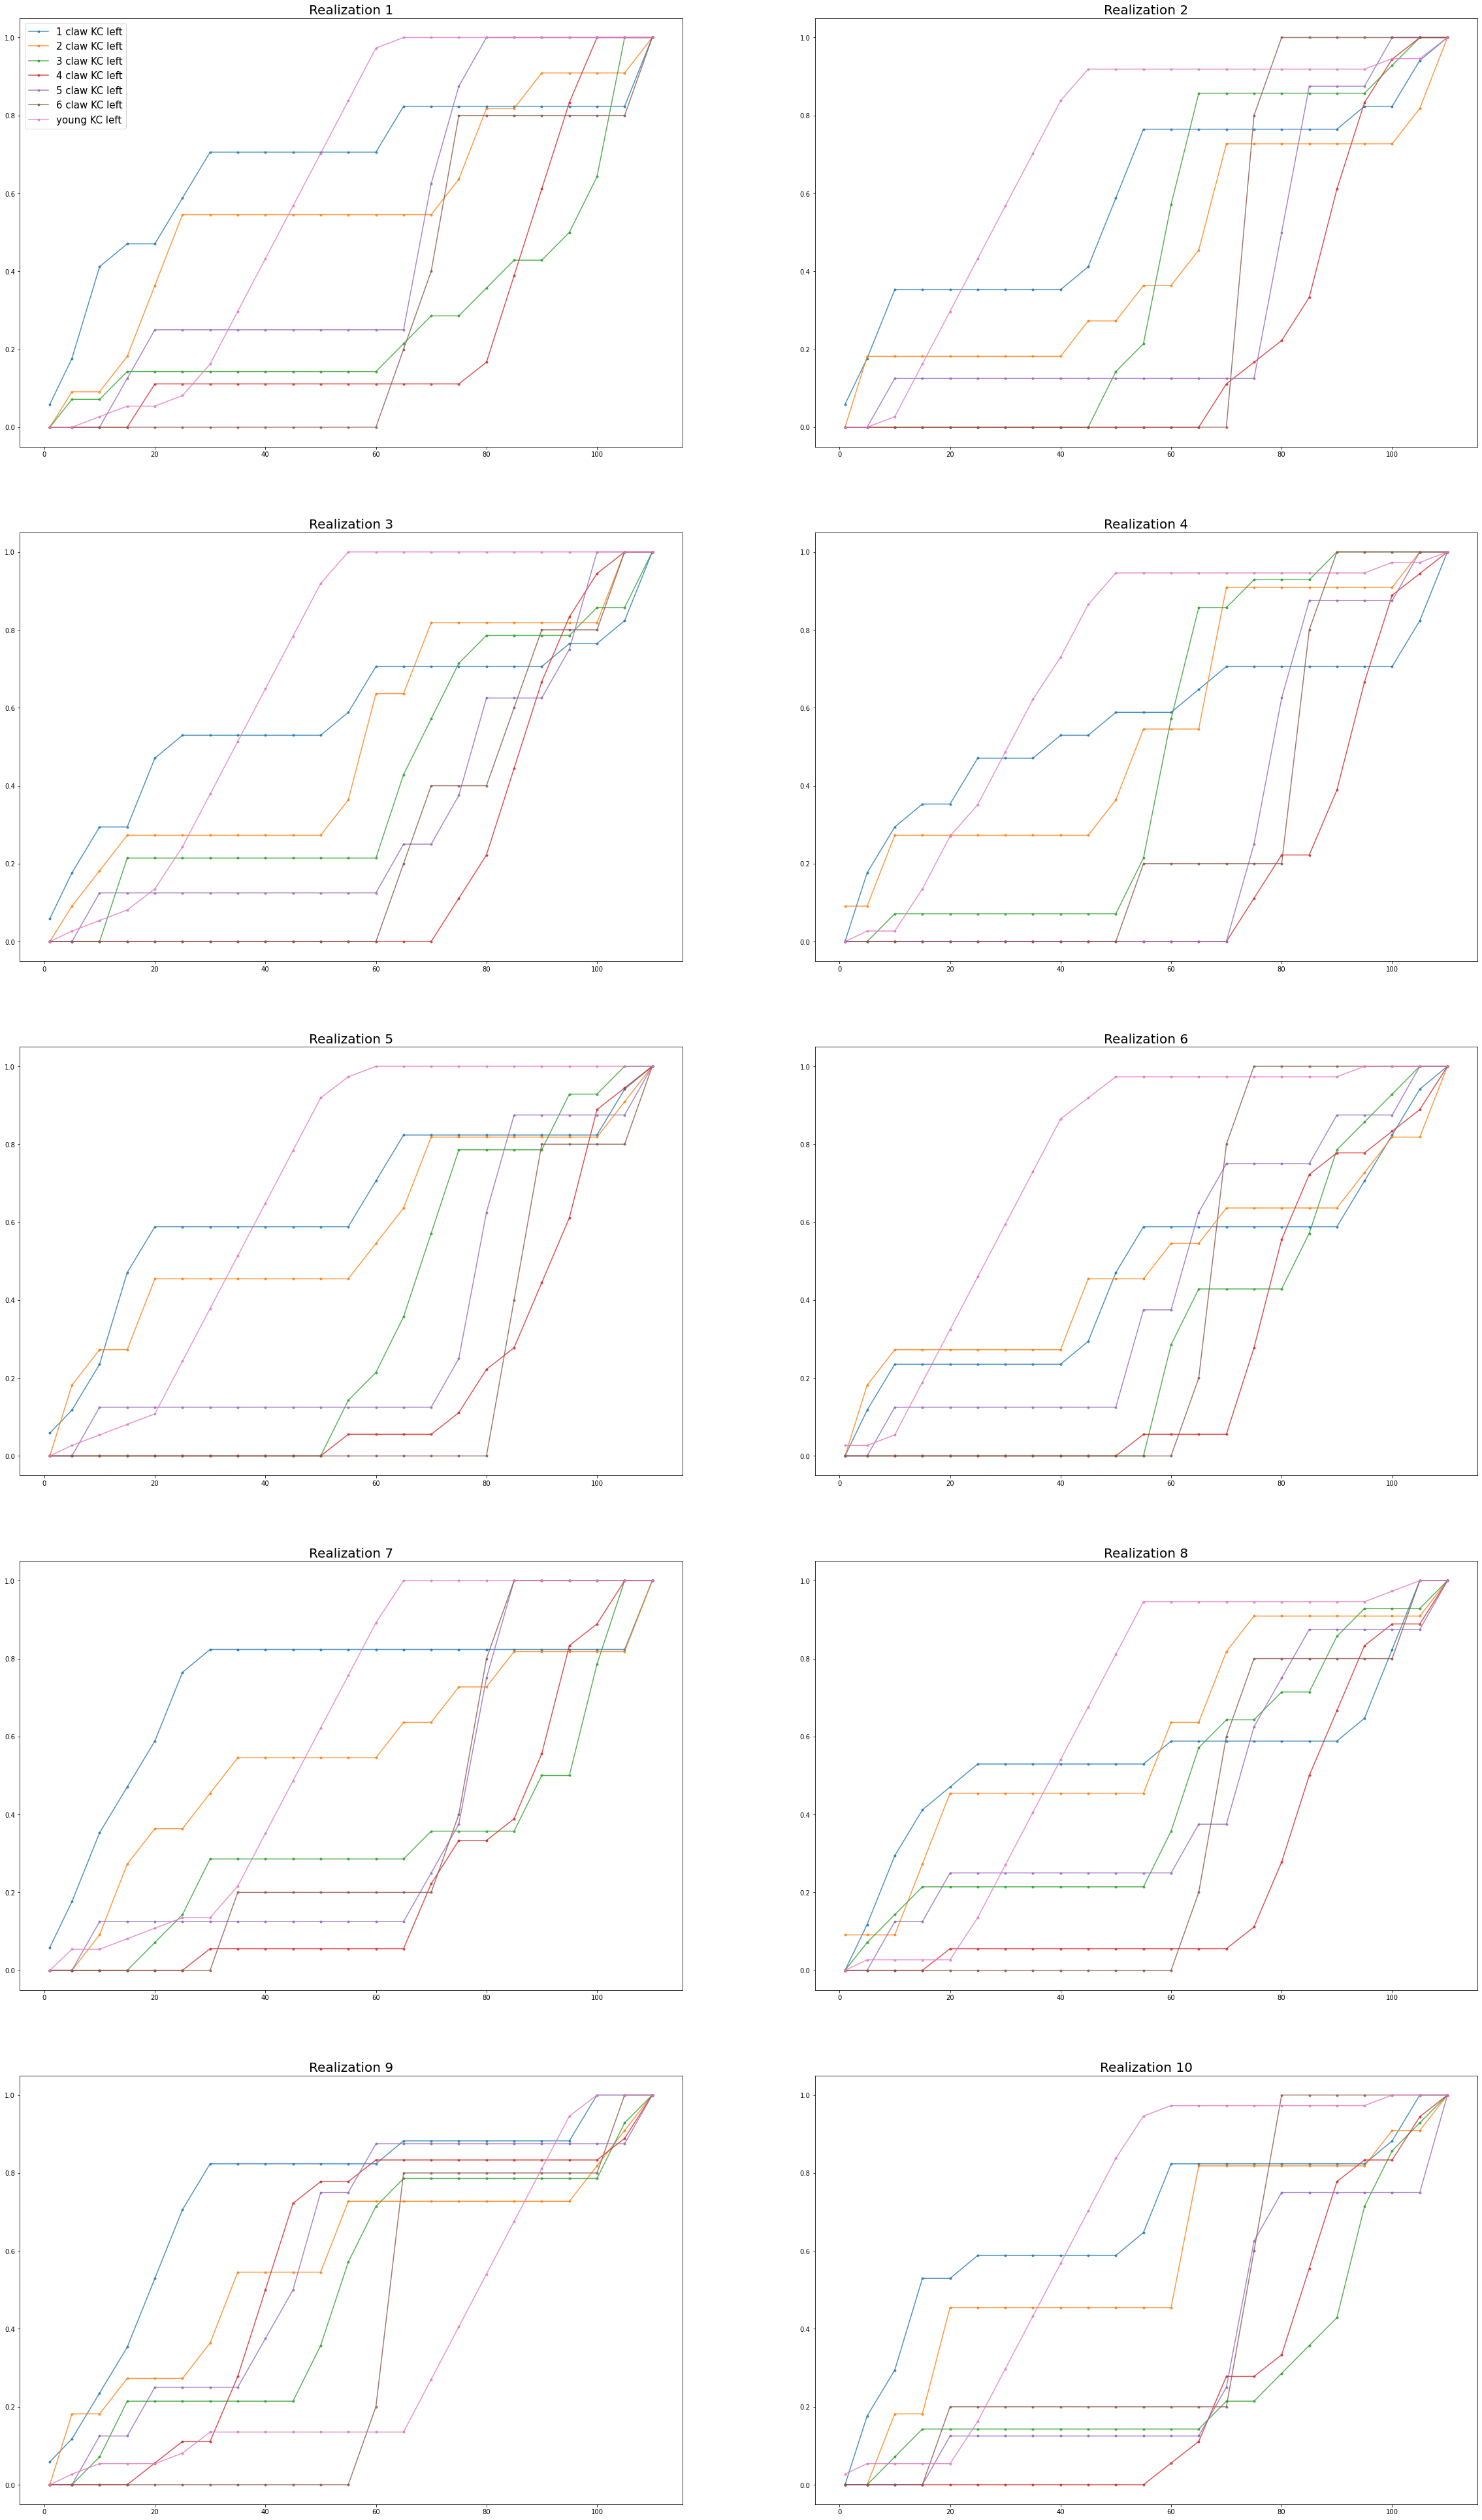

In [16]:
# plot graph
fig, ax = plt.subplots(5, 2, figsize=(40, 70))

a = 0 # number realizations
for row in range(5):
    for col in range(2):
        for t in range(7):
            ax[row, col].plot(x, y[a,t], alpha=0.8, marker='.', label=kc_types[t])
        #     plt.scatter(x, y[0,t], alpha=0.8, s=5)
        ax[row, col].set_title(f"Realization {a+1}", fontsize=20)
        if a == 0:
            ax[row, col].legend(fontsize=15)
        a += 1
plt.show()

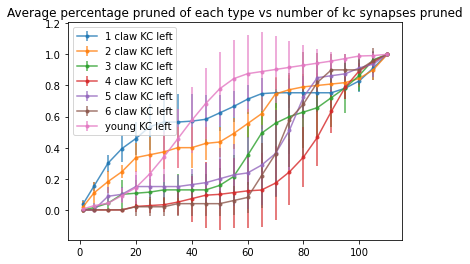

In [8]:
# averaged plot

# calculate average percentages across realizations
y_avg = np.mean(y, axis=0)
# print(len(y_avg))
# print(y_avg)

# calculate std of percentages across realizations
y_std = np.std(y, axis=0)

# plot
plt.figure()
for t in range(7):
    plt.errorbar(x, y_avg[t], yerr=y_std[t], alpha=0.8, marker='.', label=kc_types[t])
plt.title("Average percentage pruned of each type vs number of kc synapses pruned")    
plt.legend()

## Average Slope of Regression vs. Error Rate

In [21]:
num_mbons = 18
K = 23
T = 5000

# get the number kc from string arr
# a - num kcs removed
def get_num_kc(str, a):
    nums = np.zeros(a)
    for i in range(a):
        end = False
        s = str[i]
        j = 1
        num_str = ""
        while end == False:
            # end loop if space is reached
            if s[-j] == " ": 
                end = True
            else:
                num_str = s[-j] + num_str
            j += 1
        nums[i] = int(num_str)
    return nums

# mbon - index of mbon
def count_num_removed(kc_mbon, nums, mbon):
    count = 0
    nums = nums.astype(int)
    for i in range(len(nums)):
        if kc_mbon.iloc[nums[i], mbon] != 0:
            count += 1
    return count

# import data for pruning
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/control2/all-error-rates7.pkl', 'rb') as f:
    error_control_p = pickle.load(f) # dimensions: R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-pruning/all-error-rates12.pkl', 'rb') as f:
    error_over_time_p = pickle.load(f) # dimensions: K, R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/control2/all-error-rates7.pkl', 'rb') as f:
    error_control_a = pickle.load(f) # dimensions: R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-ablation/all-error-rates14.pkl', 'rb') as f:
    error_over_time_a = pickle.load(f) # dimensions: K, R, T, num_mbons
    
with open('C:/Katherine/Research/experiment-data-v3/10-odors/random-ablation/kcs-removed14.pkl', 'rb') as f:
    kcs_removed = pickle.load(f)

E = 10 # number of error rate thresholds
rates = np.linspace(0.05, 0.5, num=10) # error rates from 0 to 0.5
all_avg_slopes = np.zeros(E)
all_sem_slopes = np.zeros(E)
    
# record x and y coordinates from every realization
x_total = np.zeros((R, num_mbons))
y_total = np.zeros((R, num_mbons))

# number of KCs supposedly to be removed
numbers = np.ones(K)
numbers[1:] = np.linspace(5, 110, 22)
numbers = numbers.astype(int).tolist()

for e in range(E):
    print(f"ERROR RATE THRESHOLD: {rates[e]}")
    for r in range(R):

        # PRUNING
        # x-axis -> number of KCs removed 
        x_a = []

        for i in range(num_mbons):
            for j in range(K):
                x_a.append(numbers[j])
        # print(x_a)

        # y-axis - final error rate for realization r
        y_a = []
        for k in range(num_mbons):
            for i in range(K):
                y_a.append(error_over_time_p[i,r,-2,k] - error_control_p[r,-2,k])


        # ABLATION
        # gets number of presynaptic KCs for each MBON
        bool_synapses = np.where(kc_mbon > 0, 1, 0)
        conn = np.zeros(num_mbons)
        for j in range(num_mbons):
            conn[j] = bool_synapses[:,j].sum()
        conn = conn.astype(int)

        # x-axis -> number of KCs removed
        x_p = []

        # x-axis calculations - calculates the actual number of synapses removed
        for i in range(num_mbons):
            for j in range(K):
                n = numbers[j] # num kcs ablated
                l = kcs_removed[j][0] # list of kcs removed for realization 1
                l_num = get_num_kc(l, n) # converts list of names to numbers

                num_removed = count_num_removed(kc_mbon, l_num, i) # number of kc connections removed from this MBON
                x_p.append(num_removed)    
        # print(x_p)

        # y-axis - final error rate for realization r
        y_p = []
        for m in range(num_mbons):
            for k in range(K):
                y_p.append(error_over_time_a[k, r, -2, m] - error_control_a[r, -2, m])
        # print(y_p)

        # SUMMARY
        # Get the x and y coordinates for summary plot
        x_p = np.asarray(x_p).reshape(num_mbons, K)
        y_p = np.asarray(y_p).reshape(num_mbons, K)

        x_a = np.asarray(x_a).reshape(num_mbons, K)
        y_a = np.asarray(y_a).reshape(num_mbons, K)

        x = np.zeros(num_mbons) # ablation
        y = np.zeros(num_mbons) # pruning

        for m in range(num_mbons):
            num_removed_x = 0
            # ablation
            found_a = False
            k_a = 0 # move through the columns
            while (not found_a) and (k_a < K): # to fix: might not work if it isn't found
                if y_a[m, k_a] >= rates[e]:
                    x[m] = x_a[m, k_a]
                    found_a = True
                k_a += 1

            # pruning
            found_p = False
            k_p = 0 # move through the columns
            while (not found_p) and (k_p < K): 
                # ablation
                if y_p[m, k_p] >= rates[e]:
                    y[m] = x_p[m, k_p]
                    found_p = True
                k_p += 1 

        print("Realization {}".format(r+1))
        print("Ablation:", x)
        print("Pruning:", y)
        print()

        x_total[r] = x
        y_total[r] = y
    
    # calculating the average slope of the regression across realizations
    all_slopes = np.zeros(10)

    for r in range(R):
        res = st.linregress(x_total[r], y_total[r])
        all_slopes[r] = res.slope
    
    all_avg_slopes[e] = np.mean(all_slopes)
    all_sem_slopes[e] = st.sem(all_slopes)

print(rates)
print(all_avg_slopes)

ERROR RATE THRESHOLD: 0.05
Realization 1
Ablation: [50. 55. 35. 35. 35. 50. 40. 35. 50. 50. 45. 50. 35. 25. 30.  0. 10. 30.]
Pruning: [36. 45. 35. 37. 39. 39. 49. 23. 44. 44. 39. 37. 27. 19. 36.  0.  4. 29.]

Realization 2
Ablation: [35. 50. 35. 35. 35. 45. 45. 30. 45. 50. 40. 45. 25. 25. 40.  0. 10. 25.]
Pruning: [36. 51. 24. 37. 39. 39. 44. 29. 44. 45. 39. 37. 30. 14. 38.  0.  4. 26.]

Realization 3
Ablation: [40. 50. 40. 30. 45. 45. 50. 25. 40. 50. 40. 40. 35. 25. 40.  0. 10. 30.]
Pruning: [41. 51. 23. 34. 41. 39. 49. 14. 50. 50. 42. 42. 32. 13. 38.  0.  8. 26.]

Realization 4
Ablation: [45. 45. 30. 45. 40. 35. 50. 25. 50. 45. 40. 45. 25. 30. 35.  0. 10. 30.]
Pruning: [41. 47. 33. 34. 40. 40. 44. 19. 46. 45. 38. 39. 33. 13. 39.  0.  8. 29.]

Realization 5
Ablation: [45. 50. 40. 40. 45. 40. 50. 30. 45. 50. 50. 30. 20. 25. 40.  1. 10. 25.]
Pruning: [36. 47. 23. 34. 40. 48. 44. 29. 46. 45. 42. 39. 32. 13. 39.  0.  8. 26.]

Realization 6
Ablation: [40. 45. 35. 40. 40. 50. 45. 30. 50. 45

Realization 6
Ablation: [55. 45. 40. 45. 55. 50. 45. 30. 50. 55. 45. 45. 45. 30. 40.  0. 15. 35.]
Pruning: [36. 60. 24. 46. 53. 51. 57. 29. 47. 58. 52. 52. 32. 23. 43.  0.  7. 26.]

Realization 7
Ablation: [40. 60. 45. 45. 45. 55. 55. 30. 45. 55. 45. 40. 40. 25. 45.  0. 10. 35.]
Pruning: [40. 55. 35. 36. 41. 39. 45. 36. 38. 55. 44. 46. 33. 22. 43.  0. 12. 31.]

Realization 8
Ablation: [50. 60. 40. 40. 45. 45. 55. 35. 45. 50. 50. 50. 40. 25. 45.  0. 15. 30.]
Pruning: [36. 51. 39. 43. 44. 39. 38. 29. 38. 55. 49. 42. 27. 23. 43.  0.  7. 26.]

Realization 9
Ablation: [50. 50. 45. 45. 45. 45. 55. 35. 50. 60. 40. 50. 35. 30. 50.  0. 10. 35.]
Pruning: [49. 55. 39. 40. 50. 45. 54. 36. 55. 53. 44. 43. 32. 23. 45.  0.  4. 31.]

Realization 10
Ablation: [55. 55. 35. 40. 45. 50. 55. 30. 40. 45. 35. 50. 45. 25. 50.  0. 10. 30.]
Pruning: [40. 55. 39. 40. 44. 46. 49. 29. 46. 53. 49. 39. 33. 22. 38.  0.  4. 31.]

ERROR RATE THRESHOLD: 0.3
Realization 1
Ablation: [50. 60. 45. 45. 45. 50. 55. 35. 50. 50

Realization 2
Ablation: [55. 60. 40. 45. 50. 50. 60. 35. 60. 60. 45. 55. 35. 30. 45.  0. 15. 35.]
Pruning: [53. 60. 35. 42. 48. 46. 52. 29. 55. 53. 52. 46. 36. 25. 43.  0. 14. 35.]

Realization 3
Ablation: [50. 65. 40. 45. 55. 50. 55. 40. 55. 60. 55. 55. 35. 25. 50.  0. 15. 35.]
Pruning: [55. 60. 41. 42. 53. 53. 59. 36. 53. 58. 54. 53. 33. 23. 44.  0.  8. 31.]

Realization 4
Ablation: [50. 60. 45. 45. 55. 55. 55. 35. 55. 60. 50. 55. 40. 30. 50.  0. 10. 35.]
Pruning: [48. 60. 46. 46. 54. 53. 59. 32. 53. 61. 54. 52. 36. 30. 48.  0. 12. 36.]

Realization 5
Ablation: [50. 55. 45. 45. 55. 50. 60. 40. 60. 60. 55. 55. 40. 30. 50.  0. 20. 35.]
Pruning: [55. 63. 45. 46. 48. 46. 57. 36. 53. 53. 52. 46. 41. 23. 43.  0.  7. 31.]

Realization 6
Ablation: [55. 60. 45. 45. 55. 50. 60. 35. 60. 60. 55. 45. 45. 30. 50.  0. 15. 35.]
Pruning: [36. 60. 45. 46. 53. 51. 57. 29. 61. 58. 52. 52. 41. 25. 51.  0. 11. 35.]

Realization 7
Ablation: [55. 60. 45. 45. 45. 55. 55. 40. 60. 55. 55. 55. 40. 30. 50.  0. 1

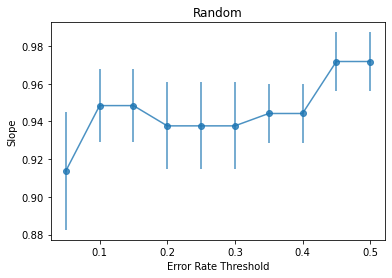

In [23]:
# plot figure
plot_data = pd.DataFrame({'ER':rates, 'Slope':all_avg_slopes, 'SEM':all_sem_slopes})

plt.figure()
# sns.scatterplot(data=plot_data, x="ER", y="Slope")
plt.errorbar(x=plot_data['ER'], y=plot_data['Slope'], yerr=plot_data['SEM'], fmt="o", ls='solid', alpha = 0.8)
plt.xlabel("Error Rate Threshold")
plt.ylabel("Slope")
plt.title("Random")
plt.show()

## Misc.

In [7]:
from sklearn.metrics import r2_score
print(x) # ablation
print(y) # pruning

vals = np.zeros((num_mbons, 2))
for i in range(num_mbons):
    vals[i, 0] = x[i]
    vals[i, 1] = y[i]
print(vals)

[50. 65. 45. 45. 55. 50. 60. 40. 60. 60. 45. 50. 40. 30. 50.  0. 20. 35.
 95.]
[ 53.  63.  45.  36.  44.  53.  59.  36.  59.  61.  49.  47.  33.  22.
  48.   0.  12.  35. 105.]
[[ 50.  53.]
 [ 65.  63.]
 [ 45.  45.]
 [ 45.  36.]
 [ 55.  44.]
 [ 50.  53.]
 [ 60.  59.]
 [ 40.  36.]
 [ 60.  59.]
 [ 60.  61.]
 [ 45.  49.]
 [ 50.  47.]
 [ 40.  33.]
 [ 30.  22.]
 [ 50.  48.]
 [  0.   0.]
 [ 20.  12.]
 [ 35.  35.]
 [ 95. 105.]]


In [21]:
rates = np.linspace(0.05, 0.5, num=10) # error rates from 0 to 0.5
print(rates)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
